# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

2. How do trees handle non-linear relationships between variables? Compare this to linear models.

3. Why is the Gini a good loss function for categorical target variables?

4. Why do trees tend to overfit, and how can this tendency be constrained?

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

# ***Q1 Answers***

1. Trees are constructued through the continuous splitting of parameters in order to refine one's way of acquiring the most accurate/statisitically comprehensive value.

2. Tree takes the features of value and split them into regions, without making assumptions on that data. Linear models try to a line through the model which requires engineering the linearity.

3. Gini is good for categorical targets because it helps decision trees find splits that create pure class groupings, which is exactly what's needed for accurate classification.

4. Trees can just continue to split until finding a perfect fit for the data. It also can accidentally memorize training data instead of learning from it. You can limit tree depth, and incorporate random forests to reduce overfitting through averaging.

5. False, trees can perform well with both numerical and categorical variables as features. The performance of decision trees is more dependent on other factors like the quality of the data, the complexity of the model, and the algorithm's tuning (like depth of the tree).

6. Most versions of classification and regression trees limit splits to 2 branches after a split because of how they are designed to simplify the decision-making process and optimize for both efficiency and interpretability. This is largely down to binary splits being much more simple, computational efficiency, and it simplifying the learning process.

7. You can look at the depth or size of the tree (for example, if the tree has lots of levels and super complex, it's probably overfitting. If it's really shallow and does not capture enough of the data's variability, it's underfitting).

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

cars_df = pd.read_csv('https://raw.githubusercontent.com/ezraattisso/linearModels/refs/heads/main/data/cars_hw.csv')
cars_df.head()



,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [6]:
## Q2.2

categorical_cols = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']
numerical_cols = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']
target_col = 'Price'

cars_dummies = pd.get_dummies(cars_df[categorical_cols], drop_first=True)

# wanting to combine the categoricals with the numerical features here.
X = pd.concat([cars_df[numerical_cols], cars_dummies], axis=1)
y = cars_df[target_col]


# Creatign the train-test split here.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# verifying the shape.
print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)




Training set shape: (780, 45)
Test set shape: (196, 45)
Training target shape: (780,)
Test target shape: (196,)


In [ ]:
## Q2.3

# Listing to store R² scores for different min_samples_leaf values.
min_samples_leaf_values = range(1, 26)
r2_scores = []

# Iterating over a bunch of possible values for min_samples_leaf.
for min_leaf in min_samples_leaf_values:
    dt_model = DecisionTreeRegressor(min_samples_leaf=min_leaf, random_state=42)
    dt_model.fit(X_train, y_train)

    y_pred = dt_model.predict(X_test) # Making predictions on test set.
    r2 = r2_score(y_test, y_pred) # Calculating the R² score
    r2_scores.append(r2)

    print(f"min_samples_leaf = {min_leaf}, R² = {r2:.4f}")

# Finding the best min_samples_leaf value here.
best_min_samples_leaf = min_samples_leaf_values[r2_scores.index(max(r2_scores))]
best_r2 = max(r2_scores)

print(f"\nBest min_samples_leaf value: {best_min_samples_leaf}")
print(f"Highest R² score on test data: {best_r2:.4f}")

# Plotting R² scores vs min_samples_leaf values.
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_values, r2_scores, marker='o')
plt.xlabel('min_samples_leaf')
plt.ylabel('R² Score on Test Data')
plt.title('R² Score vs min_samples_leaf')
plt.grid(True)
plt.axvline(x=best_min_samples_leaf, color='red', linestyle='--',
           label=f'Best value: {best_min_samples_leaf}')
plt.legend()
plt.tight_layout()
plt.show()

# Training the best model here.
best_model = DecisionTreeRegressor(min_samples_leaf=best_min_samples_leaf, random_state=42)
best_model.fit(X_train, y_train)

# Here I want to visualize the best tree (only if it's not too large).
if best_model.tree_.node_count < 50:  # keeping plot small.
    plt.figure(figsize=(20, 10))
    plot_tree(best_model, feature_names=X_train.columns, filled=True, rounded=True)
    plt.title(f"Decision Tree with min_samples_leaf = {best_min_samples_leaf}")
    plt.show()
else:
    print("Tree is too large to visualize effectively")



In [ ]:
## Q2.4

# Training the decision tree regressor with the optimal min_samples_leaf
optimal_dt = DecisionTreeRegressor(min_samples_leaf=best_min_samples_leaf, random_state=42)
optimal_dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = optimal_dt.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test set R²: {r2:.4f}")
print(f"Test set RMSE: {rmse:.2f}")

# Plotting the dendogram decision tree.
plt.figure(figsize=(20, 10))
plot_tree(optimal_dt, feature_names=X_train.columns, filled=True, rounded=True,
          fontsize=10, max_depth=3)
plt.title(f"Decision Tree with min_samples_leaf = {best_min_samples_leaf} (Limited to depth 3)")
plt.tight_layout()
plt.show()

# Calculating and plotting the residuals.
residuals = y_test - y_pred
plt.figure(figsize=(12, 8))

# Subplot 1: Residuals vs Predicted values
plt.subplot(2, 1, 1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True)

# Subplot 2: Distribution of residuals
plt.subplot(2, 1, 2)
sns.histplot(residuals, kde=True)
plt.axvline(x=0, color='r', linestyle='-')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)

mean_residuals = np.mean(residuals)
median_residuals = np.median(residuals)
plt.annotate(f'Mean: {mean_residuals:.2f}\nMedian: {median_residuals:.2f}',
             xy=(0.7, 0.8), xycoords='axes fraction')

plt.tight_layout()
plt.show()

print(f"Mean of residuals: {mean_residuals:.4f}")
print(f"Median of residuals: {median_residuals:.4f}")
print(f"Skewness of residuals: {residuals.skew():.4f}")


## Slightly skewed to the right of 0 but overall still symmetric.

Model Performance Comparison:
--------------------------------------------------
Linear Regression:
  R² Score: 0.8203
  RMSE: 143575.20
Decision Tree (min_samples_leaf=5):
  R² Score: 0.8253
  RMSE: 141536.54
--------------------------------------------------


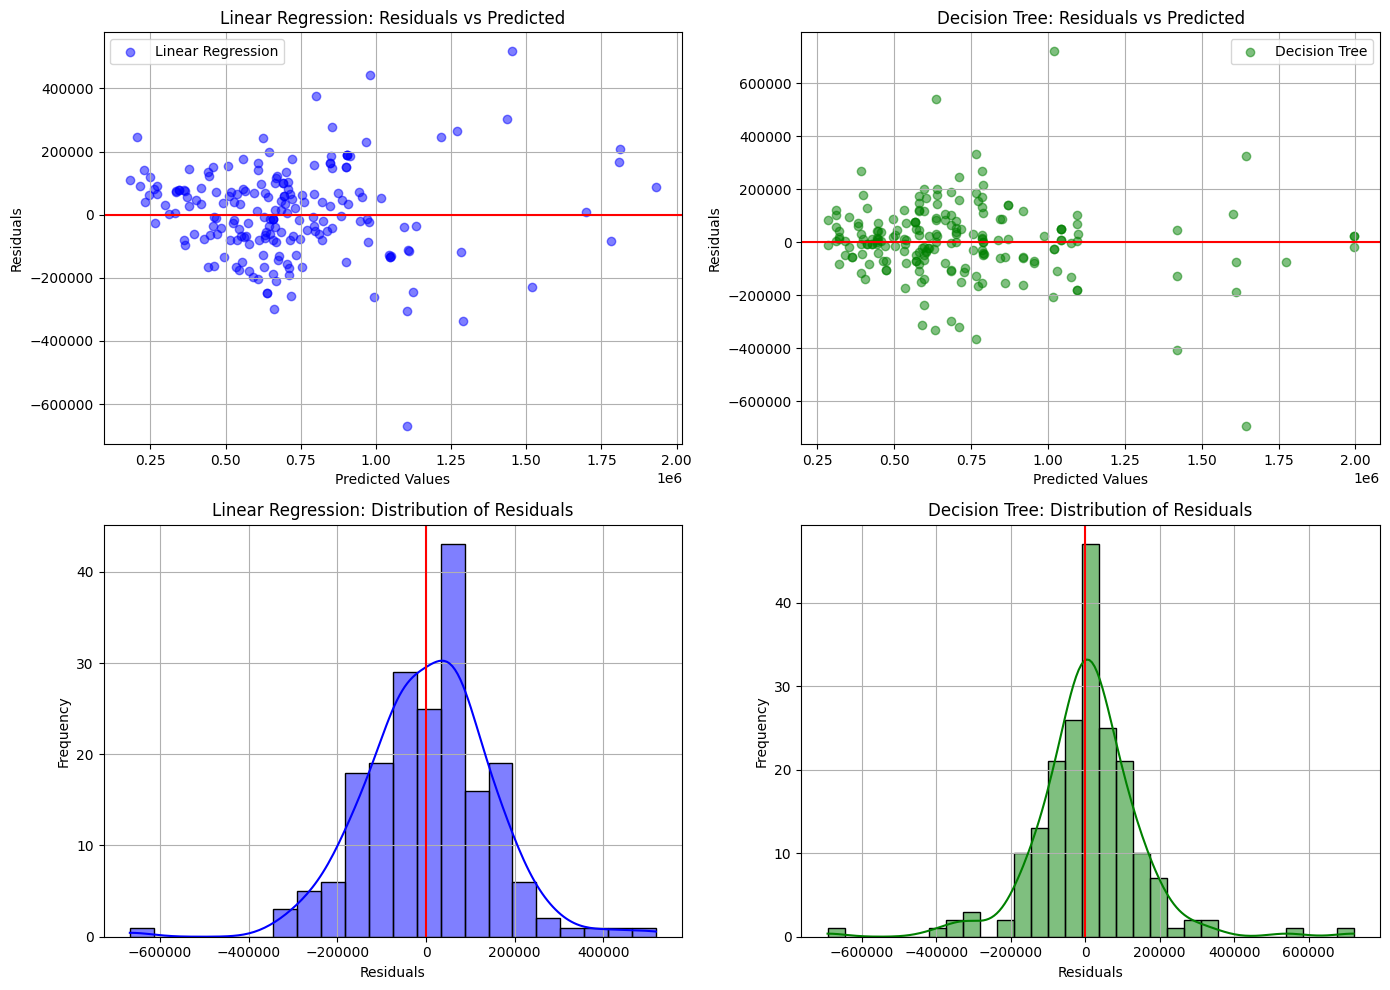

Residual Statistics:
--------------------------------------------------
Linear Regression:
  Mean of residuals: 5204.9199
  Median of residuals: 7228.4144
  Skewness of residuals: -0.2275
Decision Tree:
  Mean of residuals: 5605.5313
  Median of residuals: 7511.9048
  Skewness of residuals: 0.0770


In [12]:
## Q2.5

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_pred = lr_model.predict(X_test)

# Calculate performance metrics for linear regression
lr_r2 = r2_score(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))

# Get the decision tree metrics for comparison (from previous model)
dt_r2 = r2
dt_rmse = rmse

print("Model Performance Comparison:")
print("-" * 50)
print(f"Linear Regression:")
print(f"  R² Score: {lr_r2:.4f}")
print(f"  RMSE: {lr_rmse:.2f}")
print(f"Decision Tree (min_samples_leaf={best_min_samples_leaf}):")
print(f"  R² Score: {dt_r2:.4f}")
print(f"  RMSE: {dt_rmse:.2f}")
print("-" * 50)

# Calculate the residuals for linear regression
lr_residuals = y_test - lr_pred

# Compare the residuals of both models
plt.figure(figsize=(14, 10))

# Residuals vs Predicted Values for both models
plt.subplot(2, 2, 1)
plt.scatter(lr_pred, lr_residuals, alpha=0.5, color='blue', label='Linear Regression')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residuals vs Predicted')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(y_pred, residuals, alpha=0.5, color='green', label='Decision Tree')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Decision Tree: Residuals vs Predicted')
plt.grid(True)
plt.legend()

# Distribution of residuals for both models
plt.subplot(2, 2, 3)
sns.histplot(lr_residuals, kde=True, color='blue')
plt.axvline(x=0, color='r', linestyle='-')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Linear Regression: Distribution of Residuals')
plt.grid(True)

plt.subplot(2, 2, 4)
sns.histplot(residuals, kde=True, color='green')
plt.axvline(x=0, color='r', linestyle='-')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Decision Tree: Distribution of Residuals')
plt.grid(True)

plt.tight_layout()
plt.show()

print("Residual Statistics:")
print("-" * 50)
print("Linear Regression:")
print(f"  Mean of residuals: {np.mean(lr_residuals):.4f}")
print(f"  Median of residuals: {np.median(lr_residuals):.4f}")
print(f"  Skewness of residuals: {pd.Series(lr_residuals).skew():.4f}")
print("Decision Tree:")
print(f"  Mean of residuals: {np.mean(residuals):.4f}")
print(f"  Median of residuals: {np.median(residuals):.4f}")
print(f"  Skewness of residuals: {pd.Series(residuals).skew():.4f}")

In [ ]:
## Q2.6

# Got predictions from both models here.
dt_predictions = y_pred  # From the decision tree model
lr_predictions = lr_pred  # From the linear regression model

# Creating a scatter plot of the predictions.
plt.figure(figsize=(10, 8))
plt.scatter(dt_predictions, lr_predictions, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Add a diagonal line

plt.xlabel('Decision Tree Predictions')
plt.ylabel('Linear Regression Predictions')
plt.title('Comparison of Price Predictions: Decision Tree vs Linear Regression')
plt.grid(True)

correlation = np.corrcoef(dt_predictions, lr_predictions)[0, 1]
plt.annotate(f'Correlation: {correlation:.4f}',
             xy=(0.05, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
mean_abs_diff = np.mean(np.abs(dt_predictions - lr_predictions))
plt.annotate(f'Mean Absolute Difference: {mean_abs_diff:.2f}',
             xy=(0.05, 0.89), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.show()

# histogram of the differences between predictions.
plt.figure(figsize=(10, 6))
diff = dt_predictions - lr_predictions
plt.hist(diff, bins=30, alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Decision Tree Predictions - Linear Regression Predictions')
plt.ylabel('Frequency')
plt.title('Differences Between Model Predictions')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Min difference: {np.min(diff):.2f}")
print(f"Max difference: {np.max(diff):.2f}")
print(f"Mean difference: {np.mean(diff):.2f}")
print(f"Median difference: {np.median(diff):.2f}")
print(f"Standard deviation of differences: {np.std(diff):.2f}")


plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.scatter(y_test, dt_predictions, alpha=0.7, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Decision Tree Predictions')
plt.title('Decision Tree: Predicted vs Actual')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.scatter(y_test, lr_predictions, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Linear Regression Predictions')
plt.title('Linear Regression: Predicted vs Actual')
plt.grid(True)

plt.tight_layout()
plt.show()

## Both the decision tree and the linear regression plots are showing nearly identical plots.


**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree.

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?